# Library import :

In [259]:
import nltk
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import urllib
from nltk.corpus import PlaintextCorpusReader
import pandas as pd
import urllib.request
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.metrics import silhouette_samples,silhouette_score
from array import *
from nltk.probability import FreqDist
import squarify
from itertools import chain
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data import :

In [193]:
pib_corpus = pd.read_csv('E:/NLP_PROJECT/PIB_DATA.csv',encoding='unicode_escape')
pib_corpus['Content'] = "Will be filled"
pib_corpus.head(2)

,Title,Ministry,Date,URL,Content
0,1 Crore Treatments Provided Under Ayushman Bha...,Ministry of Health and Family Welfare,21 MAY 2020 6:16PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,Will be filled
1,Pradhan Mantri Garib Kalyan Package: Insurance...,Ministry of Health and Family Welfare,29 MAR 2020 5:14PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,Will be filled


# Reading the content from URL :

In [194]:
for i in range(0,len(pib_corpus),1):
    webUrl  = urllib.request.urlopen(pib_corpus.iloc[i,3])
    data = webUrl.read()
    raw = BeautifulSoup(data,"html.parser").get_text()
    pib_corpus.loc[i,"Content"] = raw
pib_corpus.head(2)

,Title,Ministry,Date,URL,Content
0,1 Crore Treatments Provided Under Ayushman Bha...,Ministry of Health and Family Welfare,21 MAY 2020 6:16PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
1,Pradhan Mantri Garib Kalyan Package: Insurance...,Ministry of Health and Family Welfare,29 MAR 2020 5:14PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...


# Removing \n, \r :

In [195]:
def remove_unnes(text):
    text_unnes = text.replace('\n', ' ')
    text_unnes = text_unnes.replace('\r', ' ')
    return text_unnes

pib_corpus['content_clean'] = pib_corpus['Content'].apply(lambda x: remove_unnes(x))

pib_corpus.head(2)

,Title,Ministry,Date,URL,Content,content_clean
0,1 Crore Treatments Provided Under Ayushman Bha...,Ministry of Health and Family Welfare,21 MAY 2020 6:16PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,...
1,Pradhan Mantri Garib Kalyan Package: Insurance...,Ministry of Health and Family Welfare,29 MAR 2020 5:14PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,...


# Removing punctuation :

In [196]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

pib_corpus['content_clean'] = pib_corpus['content_clean'].apply(lambda x: remove_punct(x))

pib_corpus.head(2)

,Title,Ministry,Date,URL,Content,content_clean
0,1 Crore Treatments Provided Under Ayushman Bha...,Ministry of Health and Family Welfare,21 MAY 2020 6:16PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,...
1,Pradhan Mantri Garib Kalyan Package: Insurance...,Ministry of Health and Family Welfare,29 MAR 2020 5:14PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,...


# Content tokenization :

In [198]:
pib_corpus['content_tokenized'] = pib_corpus['content_clean'].apply(lambda x: nltk.word_tokenize(x.lower()))
pib_corpus.head(2)

,Title,Ministry,Date,URL,Content,content_clean,content_tokenized
0,1 Crore Treatments Provided Under Ayushman Bha...,Ministry of Health and Family Welfare,21 MAY 2020 6:16PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,...,"[ministry, of, health, and, family, welfare, 1..."
1,Pradhan Mantri Garib Kalyan Package: Insurance...,Ministry of Health and Family Welfare,29 MAR 2020 5:14PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,...,"[ministry, of, health, and, family, welfare, p..."


# Removing stopwards :

In [199]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text

pib_corpus['content_nostop'] = pib_corpus['content_tokenized'].apply(lambda x: remove_stopwords(x))

pib_corpus.head(2)

,Title,Ministry,Date,URL,Content,content_clean,content_tokenized,content_nostop
0,1 Crore Treatments Provided Under Ayushman Bha...,Ministry of Health and Family Welfare,21 MAY 2020 6:16PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,...,"[ministry, of, health, and, family, welfare, 1...","[ministry, health, family, welfare, 1, crore, ..."
1,Pradhan Mantri Garib Kalyan Package: Insurance...,Ministry of Health and Family Welfare,29 MAR 2020 5:14PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,...,"[ministry, of, health, and, family, welfare, p...","[ministry, health, family, welfare, pradhan, m..."


# Lematization of content :

In [201]:
wn = nltk.WordNetLemmatizer()
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

pib_corpus['content_lemmatized'] = pib_corpus['content_nostop'].apply(lambda x: lemmatizing(x))

pib_corpus.head(2)

,Title,Ministry,Date,URL,Content,content_clean,content_tokenized,content_nostop,content_lemmatized
0,1 Crore Treatments Provided Under Ayushman Bha...,Ministry of Health and Family Welfare,21 MAY 2020 6:16PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,...,"[ministry, of, health, and, family, welfare, 1...","[ministry, health, family, welfare, 1, crore, ...","[ministry, health, family, welfare, 1, crore, ..."
1,Pradhan Mantri Garib Kalyan Package: Insurance...,Ministry of Health and Family Welfare,29 MAR 2020 5:14PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,...,"[ministry, of, health, and, family, welfare, p...","[ministry, health, family, welfare, pradhan, m...","[ministry, health, family, welfare, pradhan, m..."


# Content without number :

In [202]:
pib_corpus['w/o_num'] = "Will be filled"
curlist = []
for i in range(0,len(pib_corpus),1) :
    
    for j in range(0,len(pib_corpus['content_lemmatized'][i]),1) :
        text = pib_corpus['content_lemmatized'][i][j]
        run = re.sub('[0-9]+', '', text)
        curlist.append(run)
    
    pib_corpus.loc[i,"w/o_num"] = curlist
    curlist=[]

# Removing some extra words :

In [204]:
extra_words = ["","\"","\'","ü","अन्न","अभियान","आत्मनिर्भर","कुष्ठावस्थाविकलांगभरणपोषणअनुदान",
               "भारत","वृद्धावस्थाकिसानपेंशनयोजना","–","–i","–rch","—","‘","’","“","”","•","₹"]
def remove_extra(some_text):
    text = [word for word in some_text if word not in extra_words]
    return text

pib_corpus['w/o_num'] = pib_corpus['w/o_num'].apply(lambda x: remove_extra(x))

pib_corpus.head(50)

,Title,Ministry,Date,URL,Content,content_clean,content_tokenized,content_nostop,content_lemmatized,w/o_num
0,1 Crore Treatments Provided Under Ayushman Bha...,Ministry of Health and Family Welfare,21 MAY 2020 6:16PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,...,"[ministry, of, health, and, family, welfare, 1...","[ministry, health, family, welfare, 1, crore, ...","[ministry, health, family, welfare, 1, crore, ...","[ministry, health, family, welfare, crore, tre..."
1,Pradhan Mantri Garib Kalyan Package: Insurance...,Ministry of Health and Family Welfare,29 MAR 2020 5:14PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,...,"[ministry, of, health, and, family, welfare, p...","[ministry, health, family, welfare, pradhan, m...","[ministry, health, family, welfare, pradhan, m...","[ministry, health, family, welfare, pradhan, m..."
2,Government of India sanctions Rs. 15000 crores...,Ministry of Health and Family Welfare,09 APR 2020 4:52PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,...,"[ministry, of, health, and, family, welfare, g...","[ministry, health, family, welfare, government...","[ministry, health, family, welfare, government...","[ministry, health, family, welfare, government..."
3,More than 2 Crore N95 Masks & more than 1 Cror...,Ministry of Health and Family Welfare,03 JUL 2020 12:37PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,...,"[ministry, of, health, and, family, welfare, m...","[ministry, health, family, welfare, 2, crore, ...","[ministry, health, family, welfare, 2, crore, ...","[ministry, health, family, welfare, crore, n, ..."
4,Union Govt. releases Rs. 890.32 cr as II insta...,Ministry of Health and Family Welfare,06 AUG 2020 1:00PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,...,"[ministry, of, health, and, family, welfare, u...","[ministry, health, family, welfare, union, gov...","[ministry, health, family, welfare, union, gov...","[ministry, health, family, welfare, union, gov..."
5,Pradhan Mantri Garib Kalyan Package Insurance...,Ministry of Health and Family Welfare,15 SEP 2020 6:33PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,...,"[ministry, of, health, and, family, welfare, ‘...","[ministry, health, family, welfare, ‘, pradhan...","[ministry, health, family, welfare, ‘, pradhan...","[ministry, health, family, welfare, pradhan, m..."
6,"Suo-Moto statement by Dr. Harsh Vardhan, Minis...",Ministry of Health and Family Welfare,14 SEP 2020 12:20PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,...,"[ministry, of, health, and, family, welfare, s...","[ministry, health, family, welfare, suomoto, s...","[ministry, health, family, welfare, suomoto, s...","[ministry, health, family, welfare, suomoto, s..."
7,Allocation of Funds to States for Battling COV...,Ministry of Health and Family Welfare,15 SEP 2020 2:57PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,...,"[ministry, of, health, and, family, welfare, a...","[ministry, health, family, welfare, allocation...","[ministry, health, family, welfare, allocation...","[ministry, health, family, welfare, allocation..."
8,Purchase of ventilators for COVID-19,Ministry of Health and Family Welfare,23 SEP 2020 6:55PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,...,"[ministry, of, health, and, family, welfare, p...","[ministry, health, family, welfare, purchase, ...","[ministry, health, family, welfare, purchase, ...","[ministry, health, family, welfare, purchase, ..."
9,COVID-19 Treatment under Ayushman Bharat Yojana,Ministry of Health and Family Welfare,23 SEP 2020 6:55PM,https:

# Removing stopwards :

In [205]:
pib_corpus['w/o_num'] = pib_corpus['w/o_num'].apply(lambda x: remove_stopwords(x))

pib_corpus.head(2)

,Title,Ministry,Date,URL,Content,content_clean,content_tokenized,content_nostop,content_lemmatized,w/o_num
0,1 Crore Treatments Provided Under Ayushman Bha...,Ministry of Health and Family Welfare,21 MAY 2020 6:16PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,...,"[ministry, of, health, and, family, welfare, 1...","[ministry, health, family, welfare, 1, crore, ...","[ministry, health, family, welfare, 1, crore, ...","[ministry, health, family, welfare, crore, tre..."
1,Pradhan Mantri Garib Kalyan Package: Insurance...,Ministry of Health and Family Welfare,29 MAR 2020 5:14PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,...,"[ministry, of, health, and, family, welfare, p...","[ministry, health, family, welfare, pradhan, m...","[ministry, health, family, welfare, pradhan, m...","[ministry, health, family, welfare, pradhan, m..."


# Removing word with length < 3 :

In [208]:
pib_corpus['w/o_num_updated'] = "Will be filled"
sh_list = []

for j in range(0,len(pib_corpus),1) :
    
    for i in range(0,len(pib_corpus['w/o_num'][j])) :
        
        if len(pib_corpus['w/o_num'][j][i]) > 2:
            
            main = pib_corpus['w/o_num'][j][i]
            sh_list.append(main)
    
    pib_corpus.loc[j,"w/o_num_updated"] = sh_list
    sh_list=[]

pib_corpus.head(2)

,Title,Ministry,Date,URL,Content,content_clean,content_tokenized,content_nostop,content_lemmatized,w/o_num,w/o_num_updated
0,1 Crore Treatments Provided Under Ayushman Bha...,Ministry of Health and Family Welfare,21 MAY 2020 6:16PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,...,"[ministry, of, health, and, family, welfare, 1...","[ministry, health, family, welfare, 1, crore, ...","[ministry, health, family, welfare, 1, crore, ...","[ministry, health, family, welfare, crore, tre...","[ministry, health, family, welfare, crore, tre..."
1,Pradhan Mantri Garib Kalyan Package: Insurance...,Ministry of Health and Family Welfare,29 MAR 2020 5:14PM,https://pib.gov.in/PressReleasePage.aspx?PRID=...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,...,"[ministry, of, health, and, family, welfare, p...","[ministry, health, family, welfare, pradhan, m...","[ministry, health, family, welfare, pradhan, m...","[ministry, health, family, welfare, pradhan, m...","[ministry, health, family, welfare, pradhan, m..."


# Blank analyzer :

In [209]:
def clean_text(text):
    return text

# TF-DIF for lemmatized content :

In [210]:
tfidf_vect_normal = TfidfVectorizer(analyzer=clean_text)
X_tfidf_normal = tfidf_vect_normal.fit_transform(pib_corpus['content_lemmatized'])
print(X_tfidf_normal.shape)

(56, 5074)


In [211]:
X_tfidf_df_normal = pd.DataFrame(X_tfidf_normal.toarray())
X_tfidf_df_normal.columns = tfidf_vect_normal.get_feature_names()
X_tfidf_df_normal.head(2)

,0,000,001,006,007,01,01012021,01032020,010321,01042020,...,—,‘,’,“,”,•,₹1400,₹2000,₹500,₹9930
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.018224,0.067700,0.196327,0.189869,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.058188,0.043232,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


# TF-DIF for without number content :

In [212]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(pib_corpus['w/o_num_updated'])
print(X_tfidf.shape)

(56, 3462)


In [213]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
X_tfidf_df.head(2)

,aadhaar,aadhaarpan,aatma,aatmanirbhar,aayog,abhiyaan,abhiyan,abhwcs,abiding,able,...,yet,yogi,yojana,yojanabr,yojna,yoy,zhu,zhusaid,zone,zoonotic
0,0.0,0.0,0.0,0.0,0.03515,0.0,0.0,0.0,0.0,0.027599,...,0.0,0.0,0.066248,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [214]:
for col in X_tfidf_df.columns:
    print(col)

aadhaar
aadhaarpan
aatma
aatmanirbhar
aayog
abhiyaan
abhiyan
abhwcs
abiding
able
abpmjay
abroad
academia
accelerated
accelerating
acceptance
access
accessibility
accident
accidental
accordance
according
accordingly
account
accountholders
accounting
accountspostal
accountsthrough
accredited
accrual
accrued
accurate
accurately
achieve
achieved
achievement
achieving
acknowledging
acqh
acquisition
across
act
acted
action
active
actively
activist
activity
actuals
acute
added
adding
addition
additional
additionality
additionally
addon
address
addressed
addressing
addressthe
adequate
adhocoutsourced
adivashis
adjoining
administered
administeredmore
administers
administration
administrative
admission
adopted
advance
advanced
advancing
adverse
adversely
advised
advises
advisor
advisory
affair
affected
affordable
afforestation
aforementioned
aforesaid
africa
age
aged
agegroups
agenciescentral
agency
aggarwal
aggregate
aggressive
agm
ago
agois
agreement
agricultural
agriculture
ahead
aid
aided
ai

# Kmeans for without number content :

C:\Users\Arijit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


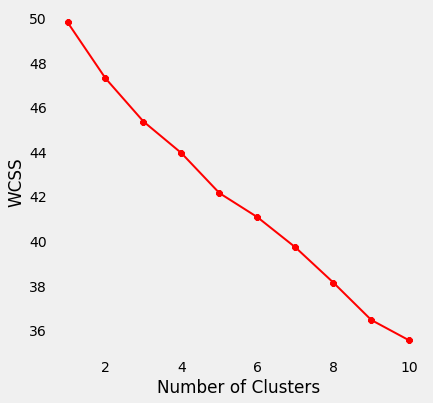

In [242]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_tfidf_df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [243]:
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print(kl.elbow)

None


C:\Users\Arijit\anaconda3\lib\site-packages\kneed\knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


In [244]:
si_avg=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_tfidf_df)
    cluster_labels = kmeans.fit_predict(X_tfidf_df)
    silhouette_avg = silhouette_score(X_tfidf_df, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    si_avg.append(silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.030815587711000576
For n_clusters = 3 The average silhouette_score is : 0.032921905792284545
For n_clusters = 4 The average silhouette_score is : 0.03397619087286713
For n_clusters = 5 The average silhouette_score is : 0.04513960250631944
For n_clusters = 6 The average silhouette_score is : 0.04175234189925172
For n_clusters = 7 The average silhouette_score is : 0.03757680738100334
For n_clusters = 8 The average silhouette_score is : 0.043908695342999716
For n_clusters = 9 The average silhouette_score is : 0.049641798314703216
For n_clusters = 10 The average silhouette_score is : 0.04786092930217965


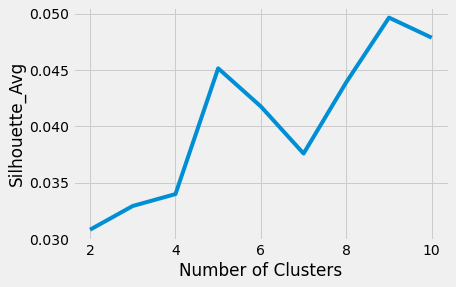

In [245]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), si_avg)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette_Avg")
plt.show()

# Most frequent 35 words :

In [246]:
pib_corpus['Most_common'] = "Will be filled"
com_list=[]
for i in range(0,len(pib_corpus),1) :
    
    for j in range(0,35,1) :
        fdist = FreqDist(pib_corpus['w/o_num_updated'][i])
        a = [fdist.most_common(35)]
        arun = a[0][j][0]
        com_list.append(arun)
    
    pib_corpus.loc[i,"Most_common"] = com_list
    com_list=[]

In [247]:
tfidf_vect_com = TfidfVectorizer(analyzer=clean_text)
X_tfidf_com = tfidf_vect_com.fit_transform(pib_corpus['Most_common'])
print(X_tfidf_com.shape)

(56, 759)


In [248]:
X_tfidf_df_com = pd.DataFrame(X_tfidf_com.toarray())
X_tfidf_df_com.columns = tfidf_vect_com.get_feature_names()
X_tfidf_df_com.head(2)

,aatma,aatmanirbhar,abhiyaan,abpmjay,accelerating,account,achieve,achieved,across,act,...,wise,within,woman,worker,working,world,worth,would,year,yojana
0,0.0,0.0,0.0,0.195071,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.160791
1,0.0,0.0,0.0,0.000000,0.0,0.152243,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.146948,0.0,0.0,0.0,0.0,0.0,0.000000


C:\Users\Arijit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


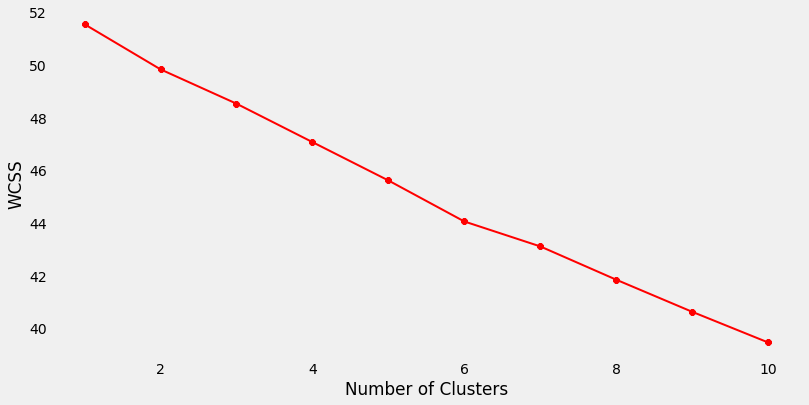

In [249]:
wcss1=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_tfidf_df_com)
    wcss1.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1, 11), wcss1, linewidth=2, color="red", marker="8")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [250]:
si_avg=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_tfidf_df_com)
    cluster_labels = kmeans.fit_predict(X_tfidf_df_com)
    silhouette_avg = silhouette_score(X_tfidf_df_com, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    si_avg.append(silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.013754297741549045
For n_clusters = 3 The average silhouette_score is : 0.014178055024803373
For n_clusters = 4 The average silhouette_score is : 0.014219790192550185
For n_clusters = 5 The average silhouette_score is : 0.01664033867417628
For n_clusters = 6 The average silhouette_score is : 0.022517953488997437
For n_clusters = 7 The average silhouette_score is : 0.019651480181790894
For n_clusters = 8 The average silhouette_score is : 0.02780251908690201
For n_clusters = 9 The average silhouette_score is : 0.028698171690007945
For n_clusters = 10 The average silhouette_score is : 0.027205736663459625


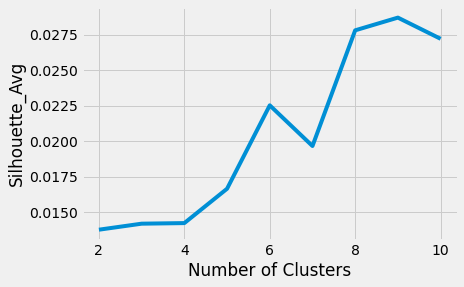

In [251]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), si_avg)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette_Avg")
plt.show()

In [253]:
tree =[]

for i in range(0,len(pib_corpus),1) :
    
    for j in range(0,35,1) :
        fdist = FreqDist(pib_corpus['w/o_num_updated'][i])
        a = [fdist.most_common(35)]
        arun = a[0][j][0]
        com_list.append(arun)
    
    tree.append(com_list)
    com_list=[]
    
tree_flat = [item for sublist in tree for item in sublist]
freq_mc=FreqDist(tree_flat).most_common(100)
tree_table = pd.DataFrame(freq_mc, columns = ['Word', 'Count'])

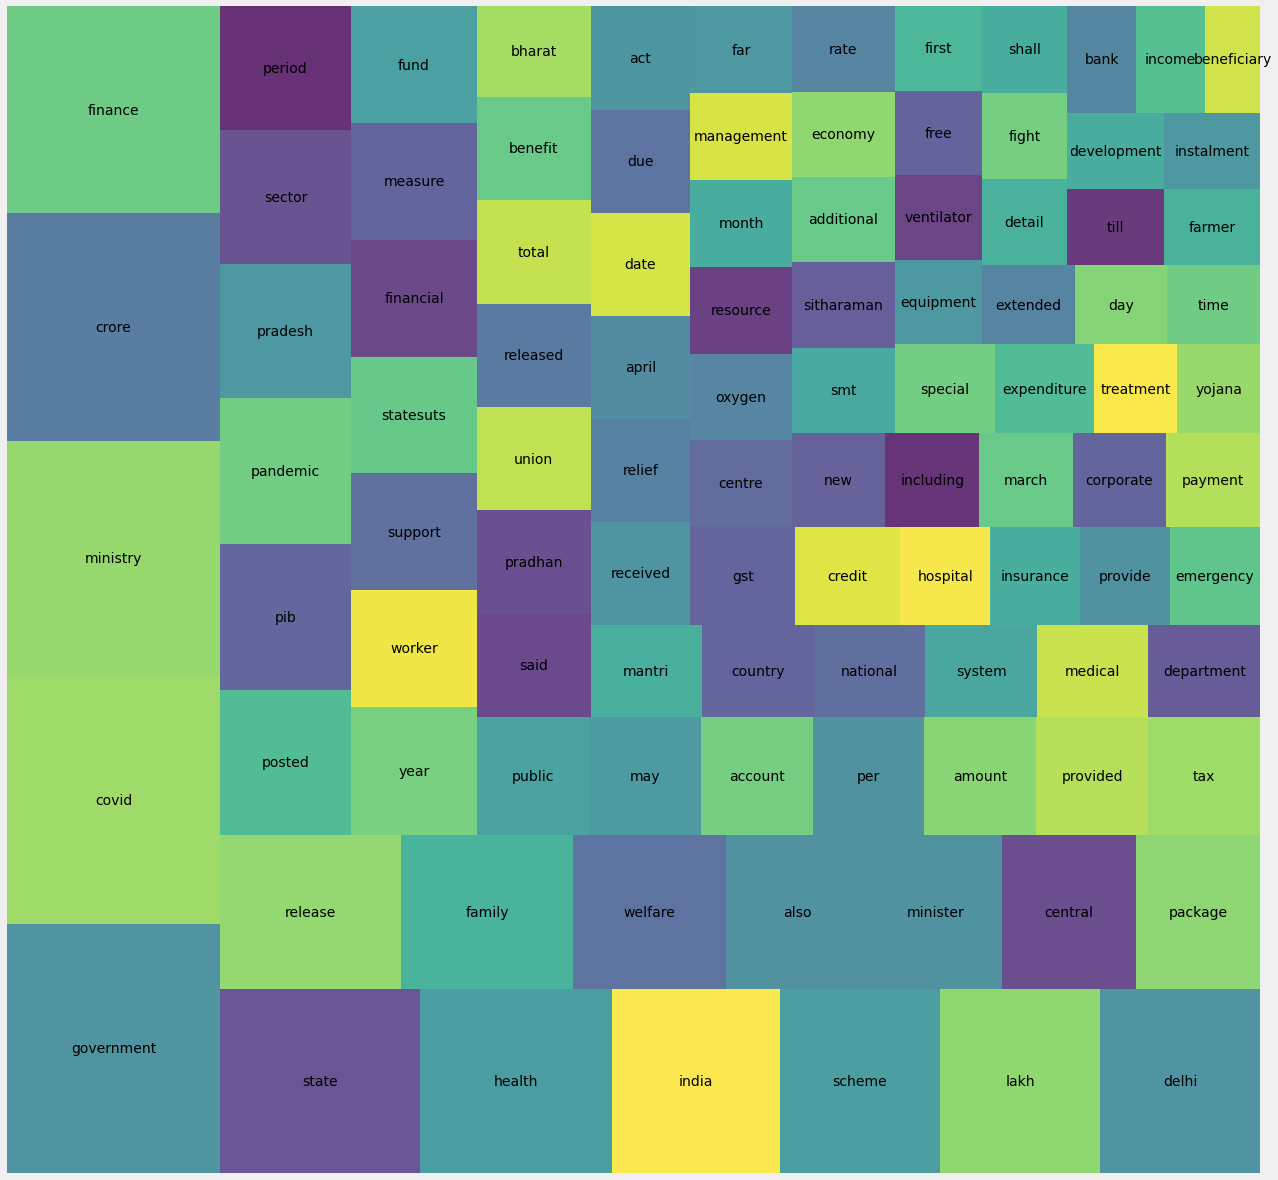

In [254]:
fig, ax = plt.subplots(1, figsize = (20,20))
squarify.plot(sizes=tree_table['Count'], 
              label=tree_table['Word'], 
              alpha=.8 )
plt.axis('off')
plt.show()

In [262]:
x_standard = StandardScaler().fit_transform(X_tfidf_df)
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x_standard)
principalDf = pd.DataFrame(data = principalComponents)

In [263]:
principalDf.head(5)

,0,1,2,3,4,5,6,7,8,9
0,0.222991,-6.518920,-3.624823,-26.792941,3.837758,-24.863436,-15.074403,67.158949,5.487142,0.766147
1,-3.105297,-4.128062,-2.038675,-1.811432,0.454354,-1.335216,0.034745,-1.637507,-1.547723,0.687202
2,-0.255496,-3.593747,-3.717882,-6.945429,-1.047688,-5.189803,0.168217,-3.222069,-5.720975,-5.068226
3,-1.316660,-3.492729,-3.116025,-3.264744,-0.260789,-4.012773,0.468833,-3.011788,-2.050930,-3.148890
4,-1.464218,-4.806614,-4.611785,-4.390120,0.165966,-4.956531,0.039298,-5.493725,-3.855533,-3.857310


In [265]:
print(principalDf.shape)

(56, 10)


In [264]:
si_avg_n=[]
for k in range(2,11):
    kmeans_n=KMeans(n_clusters=k, init="k-means++")
    kmeans_n.fit(principalDf)
    cluster_labels = kmeans_n.fit_predict(principalDf)
    silhouette_avg = silhouette_score(principalDf, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    si_avg_n.append(silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.7886748348111785
For n_clusters = 3 The average silhouette_score is : 0.6856644115649112
For n_clusters = 4 The average silhouette_score is : 0.6802572685827222
For n_clusters = 5 The average silhouette_score is : 0.6714376129855392
For n_clusters = 6 The average silhouette_score is : 0.6763672554560453
For n_clusters = 7 The average silhouette_score is : 0.681825474032397
For n_clusters = 8 The average silhouette_score is : 0.6902074932516175
For n_clusters = 9 The average silhouette_score is : 0.6946267563023903
For n_clusters = 10 The average silhouette_score is : 0.6994450286430326


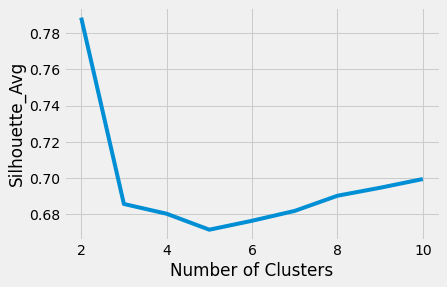

In [266]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), si_avg_n)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette_Avg")
plt.show()

In [34]:
a = [fdist.most_common(10)]
a

[[('health', 24),
  ('crore', 22),
  ('treatment', 20),
  ('ayushman', 20),
  ('bharat', 18),
  ('hospital', 18),
  ('dr', 14),
  ('family', 12),
  ('india', 12),
  ('abpmjay', 10)]]

In [103]:
dir(fdist)

['B',
 'N',
 'Nr',
 '_N',
 '__add__',
 '__and__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__isub__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__missing__',
 '__module__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_cumulative_frequencies',
 '_keep_positive',
 'clear',
 'copy',
 'elements',
 'freq',
 'fromkeys',
 'get',
 'hapaxes',
 'items',
 'keys',
 'max',
 'most_common',
 'pformat',
 'plot',
 'pop',
 'popitem',
 'pprint',
 'r_Nr',
 'setdefault',
 'subtract',
 'tabulate',
 'update',
 'values']

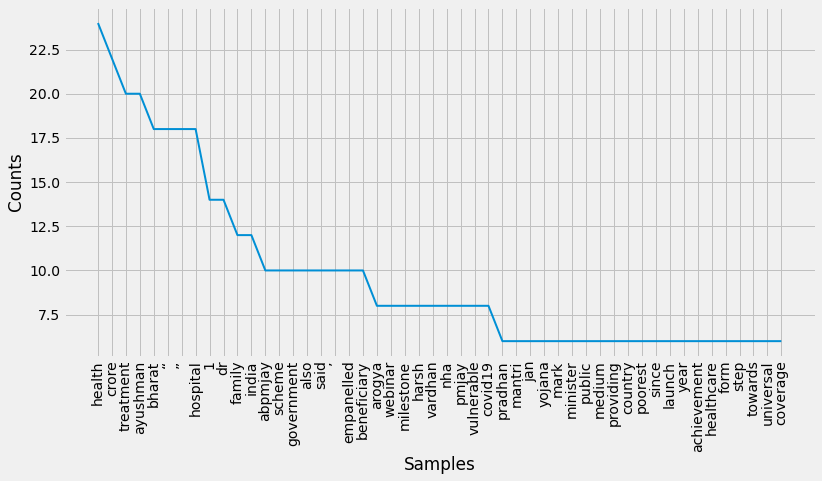

In [81]:
plt.figure(figsize=(12,6))
fdist.plot(50)

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(X_tfidf_df)

In [18]:
dir(kmeans)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algorithm',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_init',
 '_n_threads',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tol',
 '_transform',
 '_validate_center_shape',
 '_validate_data',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_features_in_',
 'n_init',
 'n_iter_',
 'n_jobs',
 'precompute_distances',
 'predict'

In [19]:
 kmeans.labels_

array([1, 1, 1, 1, 1, 3, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 3, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 2, 3, 0, 0, 1, 0, 0, 2,
       2, 3, 2, 0, 2, 3, 0, 0, 0, 3, 3, 3])

In [20]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42,}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_tfidf_df)
    sse.append(kmeans.inertia_)

C:\Users\Arijit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


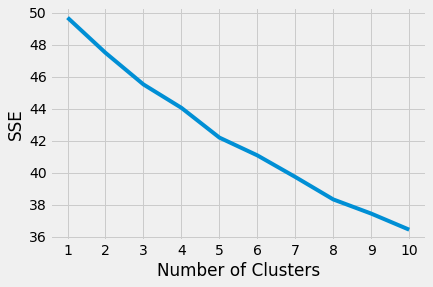

In [22]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [24]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

5

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5).fit(X_tfidf_df)

In [26]:
kmeans.labels_

array([3, 3, 3, 1, 3, 2, 3, 4, 4, 4, 4, 3, 4, 3, 3, 1, 1, 3, 1, 2, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 4, 4, 3, 1, 1, 3, 1, 1, 4,
       4, 2, 4, 1, 4, 2, 1, 1, 1, 2, 2, 2])

In [43]:
from array import *

In [50]:
Labels = kmeans.labels_
Labels = Labels.tolist()
Labels

[3,
 3,
 3,
 1,
 3,
 2,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 3,
 1,
 1,
 3,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 4,
 4,
 3,
 1,
 1,
 3,
 1,
 1,
 4,
 4,
 2,
 4,
 1,
 4,
 2,
 1,
 1,
 1,
 2,
 2,
 2]

In [54]:
URL = pib_corpus['URL']
URL = URL.tolist()
URL

['https://pib.gov.in/PressReleasePage.aspx?PRID=1625833',
 'https://pib.gov.in/PressReleasePage.aspx?PRID=1609041',
 'https://pib.gov.in/PressReleasePage.aspx?PRID=1612534',
 'https://pib.gov.in/PressReleasePage.aspx?PRID=1636094',
 'https://pib.gov.in/PressReleasePage.aspx?PRID=1643694',
 'https://pib.gov.in/PressReleasePage.aspx?PRID=1654635',
 'https://pib.gov.in/PressReleasePage.aspx?PRID=1653947',
 'https://pib.gov.in/PressReleasePage.aspx?PRID=1654446',
 'https://pib.gov.in/PressReleasePage.aspx?PRID=1658282',
 'https://pib.gov.in/PressReleasePage.aspx?PRID=1658281',
 'https://pib.gov.in/PressReleasePage.aspx?PRID=1694442',
 'https://pib.gov.in/PressReleasePage.aspx?PRID=1696434',
 'https://pib.gov.in/PressReleasePage.aspx?PRID=1696437',
 'https://pib.gov.in/PressReleasePage.aspx?PRID=1703737',
 'https://pib.gov.in/PressReleasePage.aspx?PRID=1703447',
 'https://pib.gov.in/PressReleasePage.aspx?PRID=1712590',
 'https://pib.gov.in/PressReleasePage.aspx?PRID=1714999',
 'https://pib.

In [56]:
dict_new = {'Lables':Labels,'URL':URL}
cluster = pd.DataFrame(dict_new)

In [58]:
cluster.to_csv('cluster.csv')